**Problem:**
Using the banking dataset, we want to create a model that will determine if the customer is going to subscribe to a term deposit.

**Questions:** What features are the most important to make this model?

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
Bank_Raw = pd.read_csv('bank-additional/bank-additional.csv', sep = ";")

We care more about recall in this situation.  The data determines which customers are going to subscribe for a bank term deposit.  Because this will affecting revenue for the company, it is more important to look at sensitivity to the model so that we minimize false negatives, which would be predicting lost revenue.  Precision in this case could result in overestimating how many people subscribe, which would be bad to predict more subscriptions than in reality for this case.

In [4]:
for i in Bank_Raw.columns:
    print(i)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y


In [5]:
Bank_Raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
# do test train split here to prevent data leakage
X_Raw = Bank_Raw.drop('y', axis = 1)
y_raw = Bank_Raw['y']

X_train, X_test, y_train, y_test = train_test_split(X_Raw, y_raw)

In [7]:
pd.isnull(X_train).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [8]:
X_quant = X_train[['age', 'campaign', 'pdays', 'previous']]
#sns.kdeplot(X_quant.age) -- normal
#sns.kdeplot(X_quant.campaign) -- normal
#sns.kdeplot(X_quant.pdays) -- not normal 
#sns.kdeplot(X_quant.previous) -- not normal

In [9]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0c7b05f8>,
      dtype=object)

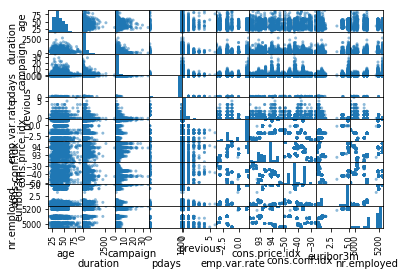

In [10]:
pd.scatter_matrix(X_train)

In [11]:
corrs = X_train.corr()

In [12]:
corrs.sort_values

<bound method DataFrame.sort_values of                      age  duration  campaign     pdays  previous  \
age             1.000000  0.039467 -0.001063 -0.013297  0.057991   
duration        0.039467  1.000000 -0.085508 -0.032095  0.012802   
campaign       -0.001063 -0.085508  1.000000  0.053459 -0.088725   
pdays          -0.013297 -0.032095  0.053459  1.000000 -0.577282   
previous        0.057991  0.012802 -0.088725 -0.577282  1.000000   
emp.var.rate   -0.016616 -0.026045  0.176042  0.267881 -0.415253   
cons.price.idx -0.015950  0.014798  0.145442  0.066502 -0.172245   
cons.conf.idx   0.092294 -0.033574  0.012570 -0.113355 -0.046454   
euribor3m      -0.010145 -0.033104  0.158475  0.294386 -0.457978   
nr.employed    -0.029514 -0.041835  0.159549  0.373897 -0.509701   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.016616       -0.015950       0.092294  -0.010145   
duration           -0.026045        0.014798      -0.033574  -0.

In [13]:
# create dummy variables for some categorical variables
contact_dummies = pd.get_dummies(X_train['contact'], prefix = "contact") #contact cellular or telephone
housing_dummies = pd.get_dummies(X_train['housing'], prefix = "housing") #housing no, yes or unknown
poutcome_dummies = pd.get_dummies(X_train['poutcome'], prefix = "outcome") #failure, success, nonexistent
default_dummies = pd.get_dummies(X_train['default'], prefix = 'default') #no yes unknown
loan_dummies = pd.get_dummies(X_train['loan'], prefix = 'loan') #no yes, unknown
month_dummies = pd.get_dummies(X_train['month'], prefix = 'month') #does not include jan, feb
day_of_week_dummies = pd.get_dummies(X_train['day_of_week'], prefix = "day") #does not include weekends


In [14]:
# create dummy variables for some categorical variables
contact_dummiestest = pd.get_dummies(X_test['contact'], prefix = "contact") #contact cellular or telephone
housing_dummiestest = pd.get_dummies(X_test['housing'], prefix = "housing") #housing no, yes or unknown
poutcome_dummiestest = pd.get_dummies(X_test['poutcome'], prefix = "outcome") #failure, success, nonexistent
default_dummiestest = pd.get_dummies(X_test['default'], prefix = 'default') #no yes unknown
loan_dummiestest = pd.get_dummies(X_test['loan'], prefix = 'loan') #no yes, unknown
month_dummiestest = pd.get_dummies(X_test['month'], prefix = 'month') #does not include jan, feb
day_of_week_dummiestest = pd.get_dummies(X_test['day_of_week'], prefix = "day")

In [41]:
X_train["cell_contact"] = contact_dummies['contact_cellular']
X_train[['housing_yes', 'housing_no']] = housing_dummies[['housing_yes', 'housing_no']]
X_train[['poutcome_success', 'poutcome_failure']] = poutcome_dummies[['outcome_success', 'outcome_failure']]
X_train[['default_unknown', 'default_no']] = default_dummies[['default_unknown', 'default_no']]
X_train[['loan_yes', 'loan_no']] = loan_dummies[['loan_yes', 'loan_no']]
X_train[['month_apr', 'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_sept', 'month_oct', 'month_nov', 'month_dec']] = month_dummies[['month_apr', 'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_sep', 'month_oct', 'month_nov', 'month_dec' ]]
X_train[['tuesday', 'wednesday', 'thursday', 'friday']] = day_of_week_dummies[['day_tue', 'day_wed', 'day_thu', 'day_fri']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [40]:
X_test["cell_contact"] = contact_dummiestest['contact_cellular']
X_test[['housing_yes', 'housing_no']] = housing_dummiestest[['housing_yes', 'housing_no']]
X_test[['poutcome_success', 'poutcome_failure']] = poutcome_dummiestest[['outcome_success', 'outcome_failure']]
X_test[['default_unknown', 'default_no']] = default_dummiestest[['default_unknown', 'default_no']]
X_test[['loan_yes', 'loan_no']] = loan_dummiestest[['loan_yes', 'loan_no']]
X_test[['month_apr', 'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_sept', 'month_oct', 'month_nov', 'month_dec']] = month_dummiestest[['month_apr', 'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_sep', 'month_oct', 'month_nov', 'month_dec' ]]
X_test[['tuesday', 'wednesday', 'thursday', 'friday']] = day_of_week_dummiestest[['day_tue', 'day_wed', 'day_thu', 'day_fri']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [17]:
y_trainer = y_train.to_frame("y")

In [18]:
y_tester = y_test.to_frame('y')

In [19]:
y_dummies = pd.get_dummies(y_trainer.y)

In [20]:
y_dummiestest = pd.get_dummies(y_tester.y)

In [21]:
y_to_train = y_dummies['yes']

In [65]:
y_to_test = y_dummiestest['yes']

In [66]:
y_to_test.count()

1030

In [26]:
baseline = y_train.value_counts(normalize= True)
baselinetest = y_to_test.value_counts(normalize = True)

In [28]:
married = pd.get_dummies(X_train.marital, prefix = 'married')
marriedtest = pd.get_dummies(X_test.marital, prefix = 'married')

In [30]:
X_train[['divorced', 'married', 'single']] = married[['married_divorced', 'married_married', 'married_single']]
X_test[['divorced', 'married', 'single']] = marriedtest[['married_divorced', 'married_married', 'married_single']]

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [31]:
job_dummies = pd.get_dummies(X_train.job)
job_dummiestest = pd.get_dummies(X_test.job)

In [32]:
X_train[['adminjob', 'bluecollarjob', 'entrepeneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']] = job_dummies[['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']]
X_test[['adminjob', 'bluecollarjob', 'entrepeneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']] = job_dummiestest[['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']]

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [33]:
price_conf_ind = X_train['cons.price.idx'] * X_train['cons.conf.idx']
price_conf_indtest = X_test['cons.price.idx'] * X_test['cons.conf.idx']

In [34]:
X_train['price_conf'] = price_conf_ind
X_test['price_conf'] = price_conf_indtest

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
varrate = X_train['emp.var.rate']* X_train['nr.employed']
X_train['varrate'] = varrate
emprate = X_train['euribor3m'] * X_train['emp.var.rate']
X_train['emprate'] = emprate
varratetest = X_test['emp.var.rate']* X_test['nr.employed']
X_test['varrate'] = varratetest
empratetest = X_test['euribor3m'] * X_test['emp.var.rate']
X_test['emprate'] = empratetest

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [43]:
successfulcampaigns = X_train.poutcome_success * X_train.campaign
X_train['successfulcampaigns'] = successfulcampaigns
previousdays = X_train['previous']*X_train['pdays']
X_train['previousdays'] = previousdays

successfulcampaignstest = X_test.poutcome_success * X_test.campaign
X_test['successfulcampaigns'] = successfulcampaignstest
previousdaystest = X_test['previous']*X_test['pdays']
X_test['previousdays'] = previousdaystest



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [44]:
print(baseline)


no     0.892846
yes    0.107154
Name: y, dtype: float64


In [45]:
print(baselinetest)

0    0.892846
1    0.107154
Name: yes, dtype: float64


In [48]:
## Logistic Regression Below
features = X_train[['age', 'pdays', 'campaign', 'housemaid', 'housing_yes', 'management', 'previousdays', 'default_no', 'loan_yes', 'single', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'varrate', 'euribor3m']]

In [52]:
featurestest = X_test[['age', 'pdays', 'campaign', 'housemaid', 'housing_yes', 'management', 'previousdays', 'default_no', 'loan_yes', 'single', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'varrate', 'euribor3m']]

In [53]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
LR = LogisticRegression()

In [54]:
LR.fit(features, y_to_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
from sklearn.model_selection import cross_val_predict
from sklearn import cross_validation


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
lr_scores = cross_val_predict(LR, features, y_to_train, method = 'decision_function')

In [57]:
lr_scores[:10]

array([-3.17318153, -2.83870161, -3.10818485, -2.8824176 , -1.85433019,
       -2.15077549, -2.72749988, -2.03785798, -3.00122641, -2.68700249])

In [58]:
lrfolds = cross_validation.KFold(len(features), n_folds = 5, shuffle = True)

In [59]:
scores = []
n= 0
print( "~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in lrfolds:
    lr = LogisticRegression().fit(features.iloc[train_index], y_to_train.iloc[train_index])
    scores.append(lr.score(features, y_to_train))
    n+=1
    print( 'Model', n)
    print( 'Score:', scores[n-1])

print( "~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print( 'Mean of scores for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Score: 0.904823567497572
Model 2
Score: 0.9054710262220783
Model 3
Score: 0.9061184849465846
Model 4
Score: 0.9064422143088378
Model 5
Score: 0.9051472968598252
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of scores for all folds: 0.9056005179669795


In [60]:
#no grid search for logistic regression because I did not scale this one.

In [61]:
LR.score(features, y_to_train)

0.9054710262220783

In [67]:
LR.score(featurestest, y_to_test)

0.8922330097087379

In [68]:
pred = LR.predict(features)
predtest = LR.predict(featurestest)

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_to_train, pred)

array([[2726,   32],
       [ 260,   71]])

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [73]:
print("Logistic Regression full report\n", classification_report(y_to_train, pred))

Logistic Regression full report
              precision    recall  f1-score   support

          0       0.91      0.99      0.95      2758
          1       0.69      0.21      0.33       331

avg / total       0.89      0.91      0.88      3089



In [71]:
print("Logistic Regression test full report\n", classification_report(y_to_test, predtest))

Logistic Regression test full report
              precision    recall  f1-score   support

          0       0.90      0.98      0.94       910
          1       0.62      0.20      0.30       120

avg / total       0.87      0.89      0.87      1030



In [62]:
## SDG

In [75]:
sgd = SGDClassifier()

In [76]:
sgd.fit(features, y_to_train)
sgd.fit(featurestest, y_to_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [80]:
sgdpred = sgd.predict(features)
sgdtestpred = sgd.predict(featurestest)

In [81]:
sgd_scores = cross_val_predict(sgd, features, y_to_train, method = 'decision_function')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

In [82]:
sgd_scores[:10]

array([-28689623.86034744, -28571328.94769177, -28691796.32132893,
       -28591860.65704335, -26260827.58668562, -33922135.62270558,
       -28573694.82203139, -26273419.59836514, -28696933.9203563 ,
       -28573818.90939875])

In [83]:
sgdfolds = cross_validation.KFold(len(features), n_folds = 5, shuffle = True)

In [84]:
scores = []
n= 0
print( "~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in lrfolds:
    sgd = SGDClassifier().fit(features.iloc[train_index], y_to_train.iloc[train_index])
    scores.append(sgd.score(features, y_to_train))
    n+=1
    print( 'Model', n)
    print( 'Score:', scores[n-1])

print( "~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print( 'Mean of scores for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Score: 0.9038523794108125
Model 2
Score: 0.7766267400453221
Model 3
Score: 0.7193266429265134
Model 4
Score: 0.6455163483327938
Model 5
Score: 0.7160893493039818
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of scores for all folds: 0.7522822920038847


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [87]:
confusion_matrix(sgdpred, y_to_train)

array([[1061,  245],
       [1697,   86]])

In [88]:
sgd.score(features, y_to_train)

0.7160893493039818

In [89]:
sgd.score(featurestest, y_to_test)

0.7359223300970874

In [90]:
print("SGD Regression full report\n", classification_report(y_to_train, sgdpred))

SGD Regression full report
              precision    recall  f1-score   support

          0       0.81      0.38      0.52      2758
          1       0.05      0.26      0.08       331

avg / total       0.73      0.37      0.47      3089



In [91]:
print("SGD Regression test full report\n", classification_report(y_to_test, sgdtestpred))

SGD Regression test full report
              precision    recall  f1-score   support

          0       0.78      0.36      0.50       910
          1       0.05      0.24      0.08       120

avg / total       0.70      0.35      0.45      1030



In [92]:
from sklearn.dummy import DummyClassifier
# dummy classifier

In [93]:
dum_dum = DummyClassifier(strategy='most_frequent')

In [94]:
dum_dum.fit(features, y_to_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [96]:
dum_dum.fit(featurestest, y_to_test)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [97]:
dum_dum.score(features, y_to_train)

0.8928455810942052

In [98]:
dum_dum.score(featurestest, y_to_test)

0.883495145631068

In [99]:
dumpreds = dum_dum.predict(features)
dumtestpreds = dum_dum.predict(featurestest)

In [100]:
dumfolds = cross_validation.KFold(len(features), n_folds = 5, shuffle = True)

In [101]:
scores = []
n= 0
print( "~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in lrfolds:
    dum = DummyClassifier().fit(features.iloc[train_index], y_to_train.iloc[train_index])
    scores.append(dum.score(features, y_to_train))
    n+=1
    print( 'Model', n)
    print( 'Score:', scores[n-1])

print( "~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print( 'Mean of scores for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Score: 0.8119132405309162
Model 2
Score: 0.8077047588216251
Model 3
Score: 0.8235674975720297
Model 4
Score: 0.8119132405309162
Model 5
Score: 0.8044674651990935
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of scores for all folds: 0.8119132405309161


In [102]:
confusion_matrix(dumpreds, y_to_train)

array([[2758,  331],
       [   0,    0]])

In [103]:
print("DummyClassifier Regression full report\n", classification_report(y_to_train, dumpreds))

DummyClassifier Regression full report
              precision    recall  f1-score   support

          0       0.89      1.00      0.94      2758
          1       0.00      0.00      0.00       331

avg / total       0.80      0.89      0.84      3089



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
print("DummyClassifier Regression test full report\n", classification_report(y_to_test, dumtestpreds))

DummyClassifier Regression test full report
              precision    recall  f1-score   support

          0       0.88      1.00      0.94       910
          1       0.00      0.00      0.00       120

avg / total       0.78      0.88      0.83      1030



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_neighbors=5)

In [126]:
knn.fit(features, y_to_train)
knn.fit(featurestest, y_to_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [127]:
knnpreds = knn.predict(features)
knntestpreds = knn.predict(featurestest)

In [128]:
knn.score(features, y_to_train)

0.8918743930074458

In [129]:
knn.score(featurestest, y_to_test)

0.9077669902912622

In [130]:
k = np.arange(2, 100)
params = [{'n_neighbors': k}]
kf = cross_validation.KFold(len(features), n_folds=5)

In [131]:
grid = GridSearchCV(knn, param_grid = params, cv = kf)

In [132]:
grid.fit(features, y_to_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=3089, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([ 2,  3, ..., 98, 99])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [133]:
grid.cv

sklearn.cross_validation.KFold(n=3089, n_folds=5, shuffle=False, random_state=None)

In [134]:
bestknn = grid.best_estimator_

In [135]:
bestpreds = bestknn.predict(features)
bestknnpreds = bestknn.predict(featurestest)

In [136]:
print("KNN Regression full report\n", classification_report(y_to_train, bestpreds))

KNN Regression full report
              precision    recall  f1-score   support

          0       0.90      0.99      0.95      2758
          1       0.69      0.11      0.19       331

avg / total       0.88      0.90      0.87      3089



In [137]:
print("KNN Regression test full report\n", classification_report(y_to_test, bestknnpreds))

KNN Regression test full report
              precision    recall  f1-score   support

          0       0.89      0.99      0.94       910
          1       0.67      0.12      0.20       120

avg / total       0.87      0.89      0.85      1030



From the four analyses, we can see that KNN did the best on the training set of the four on all counts.  However, the test set, it didn't do very well on the test set.  On the test set, Logistic Regression seems to have done the best.  Recall for guessing "!" was pretty terrible across the board, and the model only did moderately better than the baseline on all accounts. Because we deemed that recall is more important in this situation, this model is probably not the best for predicting whether someone will subscribe to a term deposit. 